In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [16]:
def read_results(file="trade_logs/results_trades.log",exitreason=None,skiprows=0):
    with open(file,"r") as f:
        data = f.readlines()
    split_data = [d[:-1].split(",") for d in data[skiprows:]]
    opens=[]
    closes=[]
    for ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason in split_data:
        if exitreason:
            if exitreason!=reason:
                continue
        opens.append(float(openprice.split("open")[-1]))
        closes.append(float(closeprice.split("closeprice")[-1])) 
            
    profits = (np.asarray(closes)-np.asarray(opens))/np.asarray(opens)
    startingfund=1
    endingfund = startingfund
    equity = [startingfund]
    for p in profits:
        endingfund *= (1+p)
        equity.append(endingfund)
    return equity,profits
def plot_profits(equity,profits,title=""):
    fig,axx = plt.subplots(2,1,sharex=True)
    ax=axx[0]
    ax.plot(equity,marker="x")
    ax.plot(np.cumsum([0]+profits)+1)
    ax.set_ylabel("equity")
    strr =f"gain={equity[-1]-1:.2%}, trades{len(profits)}, win%{sum(profits>0)/len(profits)*100:.2f}%"
    strr+=f", avg{(np.mean(profits))*100:.2f}%"
    ax.text(0.01,0.99,strr, ha="left",va="top",transform=ax.transAxes)
    ax.set_title(title)
    ax=axx[1]
    ax.set_xlabel("trades")
    ax.plot(profits,marker="x")
    ax.axhline(0)
    plt.show()

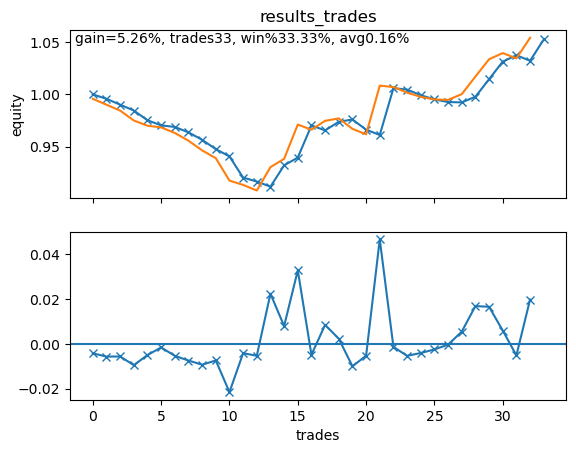

In [17]:
equity,profits = read_results(file="trade_logs/results_trades.log")
plot_profits(equity,profits,"results_trades")

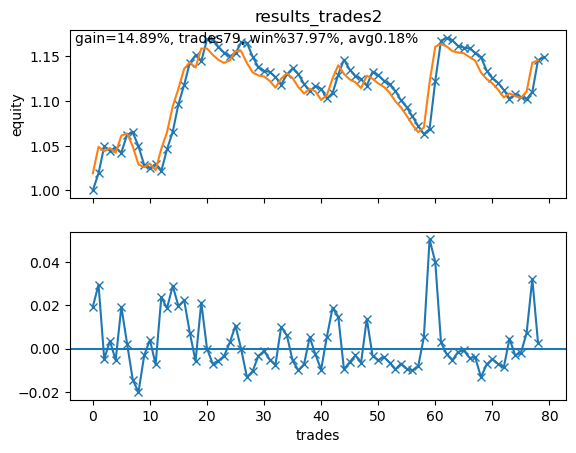

In [18]:
equity,profits = read_results(file="trade_logs/results_trades2.log")
plot_profits(equity,profits,"results_trades2")

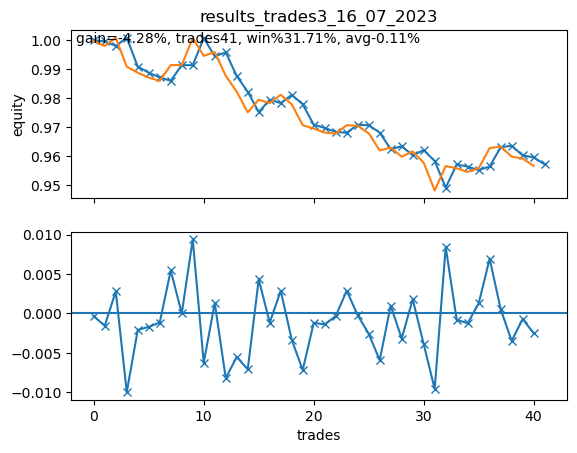

In [19]:
equity,profits = read_results(file="trade_logs/results_trades3_16_07_2023.log")
plot_profits(equity,profits,"results_trades3_16_07_2023")

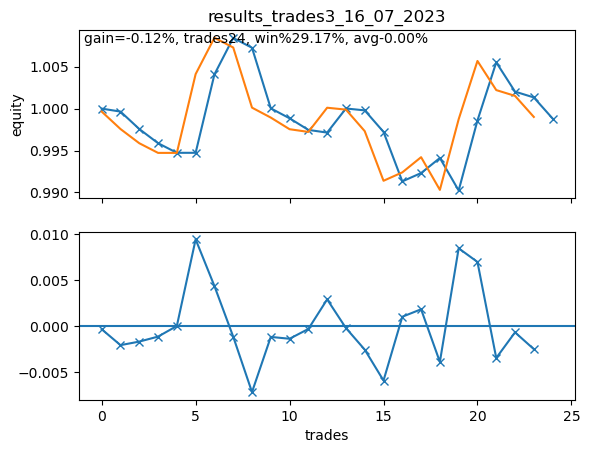

In [20]:
equity,profits = read_results(file="trade_logs/results_trades3_16_07_2023.log",exitreason="exitreasonexit_from_read_signal")
plot_profits(equity,profits,"results_trades3_16_07_2023")

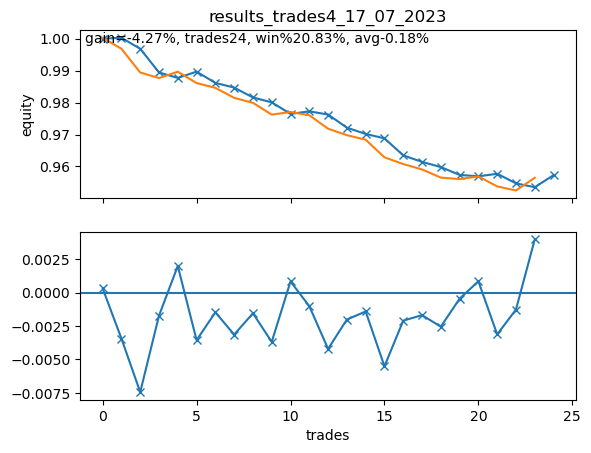

In [21]:
equity,profits = read_results(file="trade_logs/results_trades4_17_07_2023.log",exitreason="exitreasonexit_from_read_signal")
plot_profits(equity,profits,"results_trades4_17_07_2023")

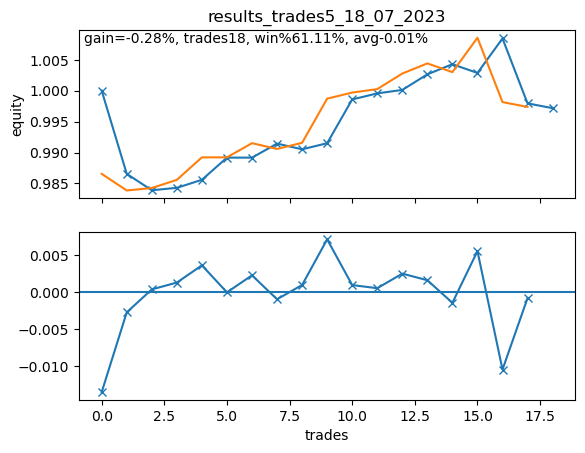

In [22]:
equity,profits = read_results(file="trade_logs/results_trades5_18_07_2023.log",exitreason="exitreasonexit_from_read_signal")
plot_profits(equity,profits,"results_trades5_18_07_2023")

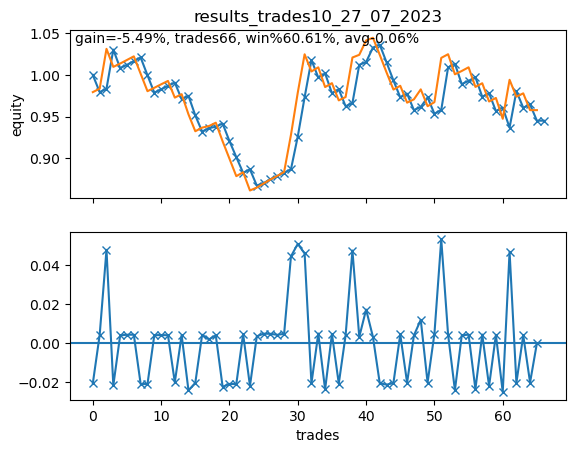

In [23]:
equity,profits = read_results(file="trade_logs/results_trades10_27_07_2023.log")
plot_profits(equity,profits,"results_trades10_27_07_2023")

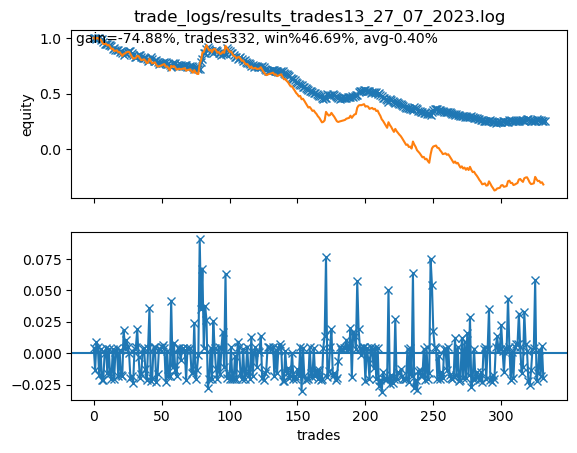

In [24]:
file="trade_logs/results_trades13_27_07_2023.log"
equity,profits = read_results(file)
plot_profits(equity,profits,file)

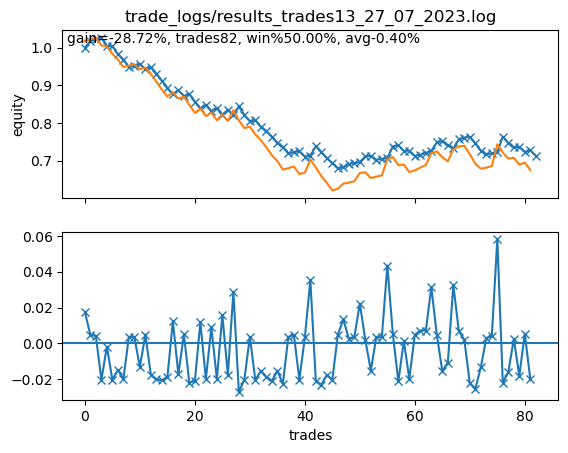

In [28]:
file="trade_logs/results_trades13_27_07_2023.log"
equity,profits = read_results(file,skiprows=250)
plot_profits(equity,profits,file)

In [40]:
import datetime

In [119]:
import mplfinance as mpf

In [305]:
%%time
stored_data = []
for ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason in split_data[0:-10]:
    dt0 = datetime.datetime.strptime(starttime[9:-3],'%Y-%m-%d_%H:%M:%S')
    ts0 = int(dt0.timestamp()*1000)
    dt1 = datetime.datetime.strptime(starttime[9:20]+exittime[8:-3],"%Y-%m-%d_%H:%M:%S")
    ts1 = int(dt1.timestamp()*1000)
    df5m = get_data(ticker,interval,start_time=ts0-15*60*1000,limit=7,offset=8*3600_000,try_interval=0) 
    df1m = get_data(ticker,"1m",start_time=ts0-15*60*1000,limit=7*5,offset=8*3600_000,try_interval=0) 
    stored_data.append( (df5m.copy(),df1m.copy() ))
    time.sleep(0.05)

CPU times: total: 1 s
Wall time: 21.9 s


In [337]:
%%time
file = "trade_logs/results_trades13_27_07_2023.log"
with open(file,"r") as f:
    data = f.readlines()
split_data = [d[:-1].split(",") for d in data[250:]]
opens=[]
closes=[]
counter=0
changes=[]
for ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason in split_data[0:-10]:
    #print(ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason) 
    dt0 = datetime.datetime.strptime(starttime[9:-3],'%Y-%m-%d_%H:%M:%S')
    ts0 = int(dt0.timestamp()*1000)
    dt1 = datetime.datetime.strptime(starttime[9:20]+exittime[8:-3],"%Y-%m-%d_%H:%M:%S")
    ts1 = int(dt1.timestamp()*1000)
    #ts0,ts1
    df5m,df1m = stored_data[counter]
    counter+=1

    open_price=df1m.iloc[15].Open
    end_price=None
    tp=0.005
    sl=-0.005
    prev_vol=df1m.iloc[15].Volume
    if df5m.iloc[2].Volume<df5m.iloc[1].Volume:continue
    if df5m.iloc[2].Volume<df5m.iloc[0].Volume:continue
    if df5m.iloc[2].Volume<df5m.iloc[0].Volume+df5m.iloc[1].Volume:continue
    for i,( op,hi,lo,cl,vol) in enumerate(df1m.iloc[15:].values):
        if lo<=(open_price*(1+sl)):
            end_price=lo
            break
        if vol<prev_vol:
            break
        if hi>=(open_price*(1+tp)):
            end_price=hi
            break
    if end_price==None:
        end_price=cl
    final_result = (end_price-open_price)/open_price
    changes.append( final_result )
    print(f"{final_result:+.2%}",ticker)
    #if counter==2:break

-0.56% BONDUSDT
-0.96% AKROUSDT
+0.79% PNTUSDT
+1.28% BONDUSDT
-0.23% LOOMUSDT
+0.00% SCUSDT
-0.22% ANKRUSDT
+0.00% PLAUSDT
-0.55% VGXUSDT
+0.00% PNTUSDT
+2.18% PLAUSDT
-0.98% HIFIUSDT
-0.79% AKROUSDT
-0.52% PLAUSDT
-0.48% SHIBUSDT
-0.70% PNTUSDT
-0.53% PLAUSDT
-0.11% SHIBUSDT
-0.11% ONGUSDT
-1.40% PUNDIXUSDT
-1.72% REIUSDT
-0.06% POWRUSDT
-1.07% RIFUSDT
+1.00% ONGUSDT
+0.57% ONGUSDT
+0.00% PUNDIXUSDT
+0.68% WANUSDT
+0.60% STEEMUSDT
-1.30% KP3RUSDT
+1.15% BONDUSDT
+2.12% REIUSDT
+0.69% BONDUSDT
+1.57% REIUSDT
-0.28% VGXUSDT
+0.00% ASTRUSDT
+0.89% VGXUSDT
-0.80% VGXUSDT
-0.27% ONGUSDT
+1.07% FUNUSDT
-1.35% PNTUSDT
+0.00% KP3RUSDT
+2.58% DCRUSDT
+2.15% KP3RUSDT
-1.18% FARMUSDT
+0.56% MOBUSDT
+2.50% ASRUSDT
-3.42% ASRUSDT
-3.19% VGXUSDT
CPU times: total: 46.9 ms
Wall time: 78.6 ms


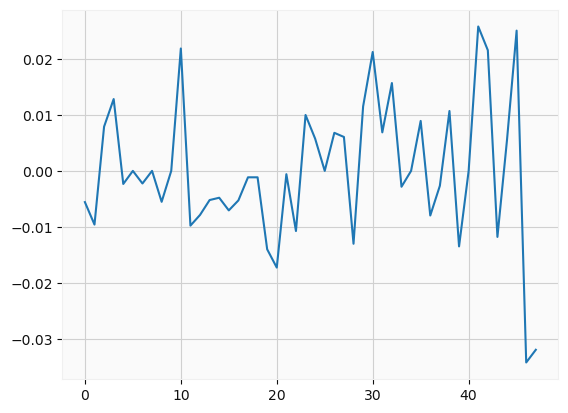

In [338]:
plt.plot(changes)

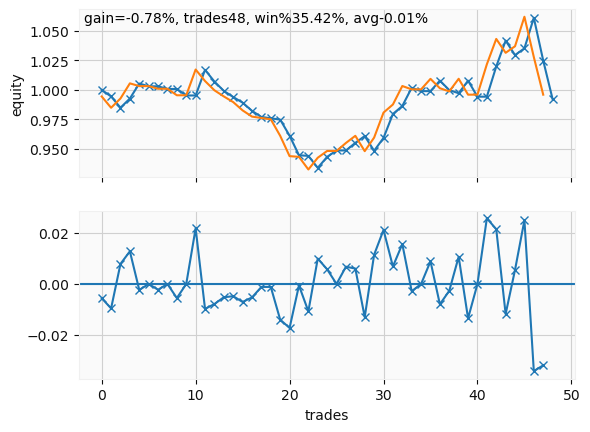

In [339]:

startingfund=1
endingfund = startingfund
equity = [startingfund]
for p in changes:
    endingfund *= (1+p)
    equity.append(endingfund)
plot_profits(equity,np.asarray(changes))

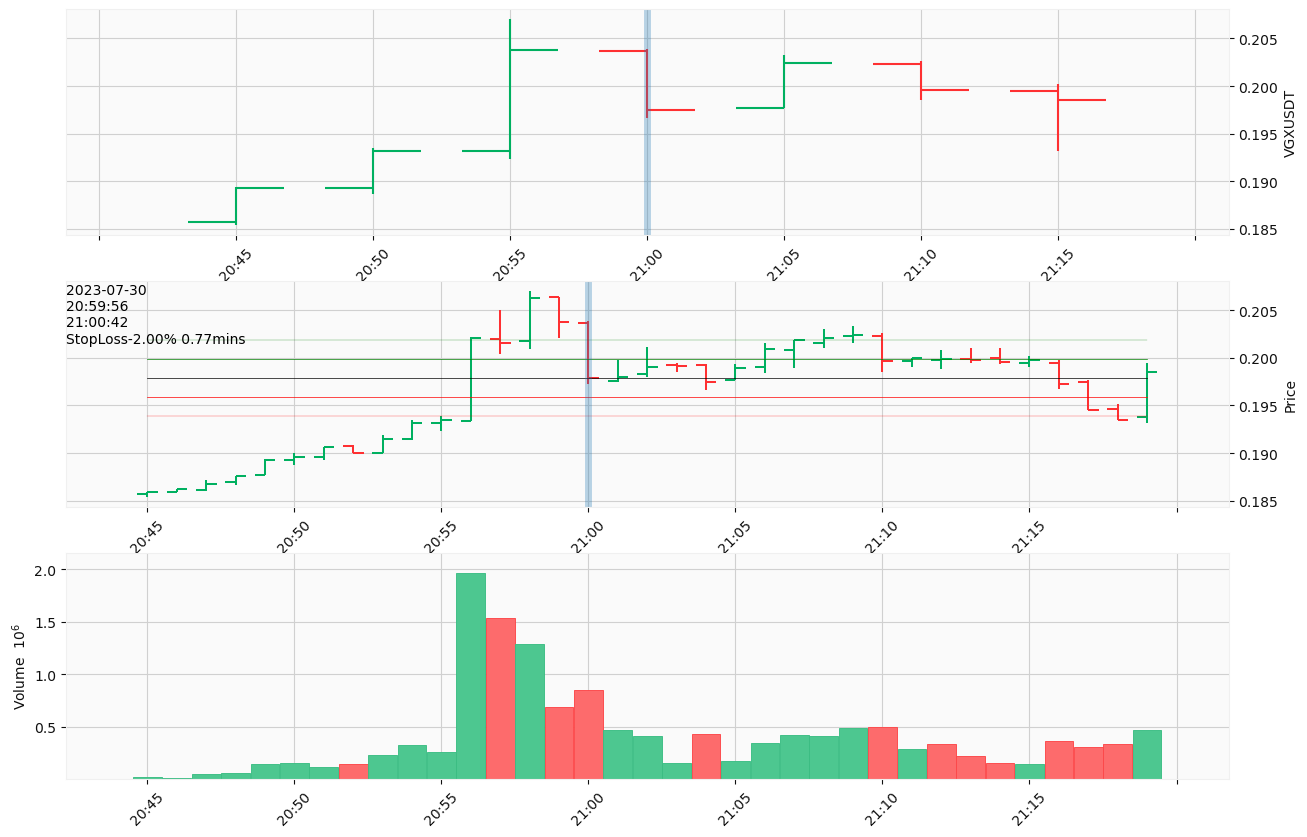

In [340]:
fig = mpf.figure(style='yahoo', figsize=(15,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3,sharex=ax2)

mpf.plot(df5m,ax=ax1,ylabel=f"{ticker}")
x=7*2+1
apds = [ mpf.make_addplot(df1m.Close*0+df1m.iloc[x].Close,ax=ax2,color='k',type='line',width=0.5, secondary_y=False),
        mpf.make_addplot(df1m.Close*0+df1m.iloc[x].Close*1.01,ax=ax2,color='g',type='line',width=0.5, secondary_y=False),
        mpf.make_addplot(df1m.Close*0+df1m.iloc[x].Close*0.99,ax=ax2,color='r',type='line',width=0.5, secondary_y=False),
        mpf.make_addplot(df1m.Close*0+df1m.iloc[x].Close*1.02,ax=ax2,color='g',type='line',width=0.2, secondary_y=False),
        mpf.make_addplot(df1m.Close*0+df1m.iloc[x].Close*0.98,ax=ax2,color='r',type='line',width=0.2, secondary_y=False),
       ]
mpf.plot(df1m,addplot=apds,ax=ax2,volume=ax3)
strr = f"{starttime[9:9+10]}\n{starttime[9+11:-3]}\n{exittime[8:-3]}"
strr += f"\n{reason[18:]} {(ts1-ts0)/60_000:.2f}mins"
ax2.text(0.0,0.99,strr, transform=ax2.transAxes,va="top");
ax1.axvline(3,ymax=0.99,lw=5,alpha=0.3)
ax2.axvline(3+12,ymax=0.99,lw=5,alpha=0.3)
if (ts1-ts0)//60_000<19 and (ts1-ts0)//60_000>0:
    ax2.axvline(3+12+(ts1-ts0)//60_000,ymax=0.99,lw=5,alpha=0.3)

# end of file

# retrieve 1m candlesticks from 5m entries, and see how to trade it

In [61]:
from aver6_funcs import get_data
import time

In [62]:
df = get_data("BTCUSDT","1s",start_time=int(time.time())*1000-3600_000,limit=3,offset=8*3600_000)
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-30 22:17:01,29305.88,29305.89,29305.88,29305.88,0.49416
2023-07-30 22:17:02,29305.89,29305.89,29305.88,29305.88,5.63815
2023-07-30 22:17:03,29305.88,29305.89,29305.88,29305.89,0.01195


In [63]:
newtime= df.iloc[-1].name.value//1000_000

In [64]:
df1 = get_data("BTCUSDT","1s",start_time=newtime-8*3600_000,limit=3,offset=8*3600_000,try_interval=0)
df1

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-30 22:17:03,29305.88,29305.89,29305.88,29305.89,0.01195
2023-07-30 22:17:04,29305.88,29305.88,29305.88,29305.88,0.00262
2023-07-30 22:17:05,29305.88,29305.88,29305.88,29305.88,0.08425
